In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('eq.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-01-01T00:28:20.289Z,-5.3245,152.5514,40.24,5.1,mb,NaN,74.0,1.190,0.79,...,2020-03-21T17:13:29.040Z,"112 km SSE of Kokopo, Papua New Guinea",earthquake,9.4,6.3,0.044,171.0,reviewed,us,us
1,2020-01-01T00:35:48.020Z,-5.3373,152.6003,32.93,4.6,mb,NaN,45.0,1.218,1.08,...,2020-03-21T17:13:47.040Z,"115 km SSE of Kokopo, Papua New Guinea",earthquake,9.9,5.6,0.096,32.0,reviewed,us,us
2,2020-01-01T01:08:54.688Z,32.2879,138.3309,321.34,4.5,mb,NaN,89.0,1.478,0.65,...,2020-03-21T17:13:29.040Z,"257 km S of ?yama, Japan",earthquake,7.9,3.7,0.056,93.0,reviewed,us,us
3,2020-01-01T01:12:17.070Z,41.8487,142.5714,68.53,4.3,mb,NaN,120.0,0.467,0.65,...,2020-03-21T17:13:05.040Z,"56 km SSE of Shizunai-furukawach?, Japan",earthquake,8.7,7.4,0.128,17.0,reviewed,us,us
4,2020-01-01T02:53:41.778Z,41.5690,19.3395,16.06,4.1,mb,NaN,51.0,0.862,0.80,...,2020-03-21T17:13:29.040Z,"28 km NNW of Durrës, Albania",earthquake,2.9,7.3,0.185,8.0,reviewed,us,us


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5000 non-null   object 
 1   latitude         5000 non-null   float64
 2   longitude        5000 non-null   float64
 3   depth            5000 non-null   float64
 4   mag              5000 non-null   float64
 5   magType          5000 non-null   object 
 6   nst              123 non-null    float64
 7   gap              4989 non-null   float64
 8   dmin             4989 non-null   float64
 9   rms              5000 non-null   float64
 10  net              5000 non-null   object 
 11  id               5000 non-null   object 
 12  updated          5000 non-null   object 
 13  place            5000 non-null   object 
 14  type             5000 non-null   object 
 15  horizontalError  4987 non-null   float64
 16  depthError       5000 non-null   float64
 17  magError      

In [9]:
df.isnull().sum()

time                  0
latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                4877
gap                  11
dmin                 11
rms                   0
net                   0
id                    0
updated               0
place                 0
type                  0
horizontalError      13
depthError            0
magError             73
magNst               48
status                0
locationSource        0
magSource             0
dtype: int64

In [15]:
drop_cols = ['time', 'id', 'updated', 'place', 'net', 'magType', 'type', 'status', 'locationSource', 'magSource']
df = df.drop(columns=drop_cols)

df = df.fillna(df.median())

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score , accuracy_score , classification_report



X = df.drop(columns=['mag'])
y = df['mag']

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
#Random Forest model
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)

RandomForestRegressor()

In [40]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([4.749 , 4.466 , 4.563 , 4.5973, 5.2592, 4.328 , 4.714 , 4.637 ,
       4.45  , 4.474 , 4.595 , 4.299 , 5.208 , 4.973 , 4.191 , 4.268 ,
       4.687 , 4.289 , 4.184 , 4.239 , 5.251 , 4.68  , 4.354 , 5.355 ,
       4.574 , 4.216 , 4.33  , 4.2008, 4.477 , 4.228 , 4.327 , 4.16  ,
       4.768 , 4.176 , 4.593 , 4.579 , 4.282 , 4.183 , 4.366 , 4.765 ,
       4.55  , 4.535 , 4.769 , 4.344 , 4.326 , 4.782 , 4.923 , 4.369 ,
       4.53  , 4.306 , 4.277 , 4.273 , 4.246 , 4.574 , 4.569 , 4.935 ,
       4.242 , 4.892 , 4.356 , 4.509 , 4.237 , 4.546 , 4.384 , 4.457 ,
       4.773 , 4.289 , 4.29  , 4.607 , 4.594 , 4.522 , 4.722 , 4.6821,
       4.29  , 4.367 , 4.319 , 4.943 , 4.566 , 4.234 , 4.375 , 4.144 ,
       5.209 , 4.3007, 4.389 , 4.173 , 4.248 , 4.573 , 4.52  , 4.284 ,
       4.193 , 4.413 , 4.542 , 4.207 , 4.276 , 4.984 , 4.353 , 4.3671,
       4.66  , 4.223 , 4.185 , 4.419 , 4.828 , 4.6745, 5.157 , 4.807 ,
       4.832 , 5.283 , 4.273 , 4.654 , 4.484 , 4.944 , 4.738 , 4.2704,
      

In [52]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf , r2_rf

(0.1527710999999999, 0.684041852059264)

In [60]:
#Gradient Boost model
gbr  = GradientBoostingRegressor(n_estimators=100)
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [61]:
y_pred_gbr = gbr.predict(X_test)
y_pred_gbr

array([4.65094873, 4.47934587, 4.5507115 , 4.56583009, 4.93109181,
       4.35891156, 4.74413592, 4.59561959, 4.33926465, 4.44849986,
       4.66390739, 4.31161023, 5.05170289, 4.84544493, 4.20490251,
       4.22416043, 4.69196269, 4.23676371, 4.21158889, 4.30578887,
       5.07853366, 4.75571611, 4.38177064, 5.14654619, 4.62836513,
       4.28116893, 4.32890042, 4.1324199 , 4.57753222, 4.27032206,
       4.40335413, 4.18041959, 4.67587959, 4.24938944, 4.61379578,
       4.59515492, 4.26350831, 4.16755473, 4.3961004 , 4.8673243 ,
       4.64396983, 4.48973899, 4.70889117, 4.42504396, 4.35800557,
       4.82840191, 5.01005215, 4.41475915, 4.62257801, 4.27538516,
       4.25773352, 4.26379199, 4.32989125, 4.53179684, 4.63584548,
       4.94702908, 4.25276627, 4.81453895, 4.42173373, 4.49451085,
       4.32180403, 4.65392155, 4.37461566, 4.53866894, 4.68470257,
       4.34853419, 4.28430309, 4.42284165, 4.53518464, 4.60281032,
       4.61897369, 4.72187888, 4.41576079, 4.3875315 , 4.36191

In [64]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr , r2_gbr

(0.16479871529180815, 0.6507686484619367)

In [87]:
from sklearn.svm import SVR
svr = SVR( kernel='rbf' , degree=5 )
svr.fit(X_train,y_train)

SVR(degree=5)

In [89]:
y_pred_svr= svr.predict(X_test)
y_pred_svr

array([4.24203139, 4.3231536 , 4.30256233, 4.46413421, 4.29099106,
       4.6034537 , 4.43483323, 4.59372843, 4.46755669, 4.31755314,
       4.20936941, 4.36045762, 4.90870479, 4.43985223, 4.289874  ,
       4.4203145 , 4.31866341, 4.28965232, 4.16424771, 4.18200719,
       4.22664367, 4.73335013, 4.42529786, 4.58159652, 4.84009221,
       4.30039133, 4.35307336, 4.92372871, 4.58107435, 4.35411375,
       4.37665963, 4.0685929 , 4.39451838, 4.68950049, 4.29127532,
       4.1797761 , 4.97732952, 4.46472109, 4.61930752, 5.04593214,
       4.53367996, 4.32207631, 4.51757914, 4.24441085, 4.21899917,
       4.2132585 , 4.61037276, 4.7978892 , 4.49809346, 4.37291561,
       4.27366061, 4.34998959, 4.17536308, 4.35337694, 4.27168092,
       4.37950889, 4.41711969, 4.7441869 , 4.54404468, 4.42850299,
       4.37266518, 4.22940885, 4.40851843, 4.67363299, 4.43159067,
       4.59048923, 4.23972568, 4.51616724, 4.78096002, 4.82748039,
       4.2654997 , 4.24394231, 4.44304241, 4.87302263, 4.33148

In [93]:
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr , r2_svr

(0.1986836738188178, 0.3639486768004726)

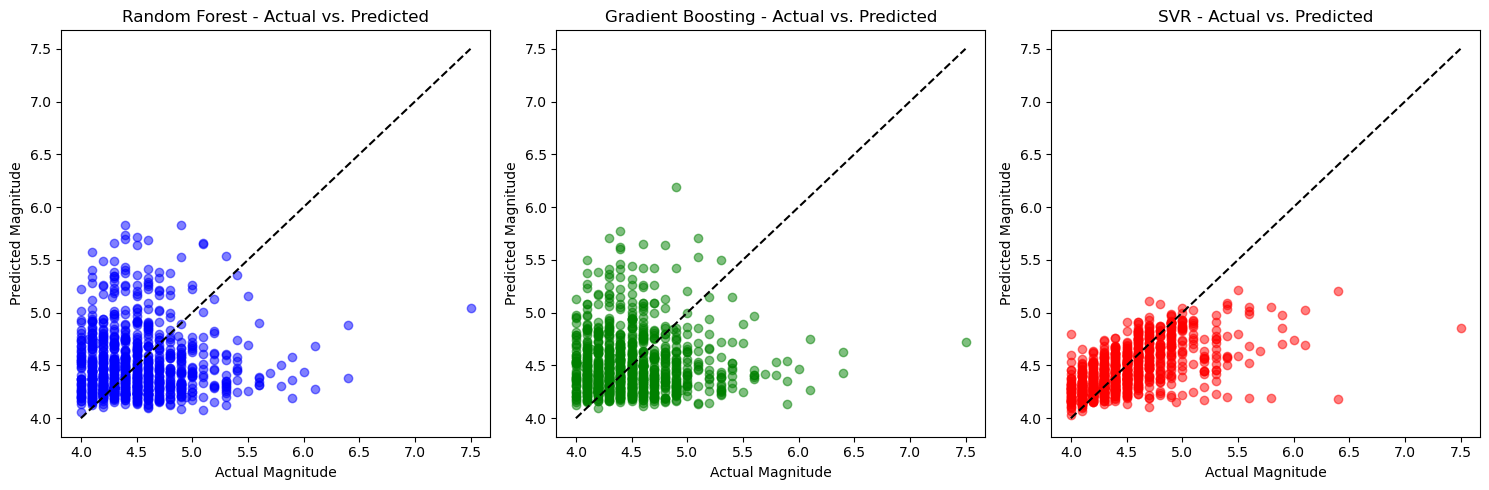

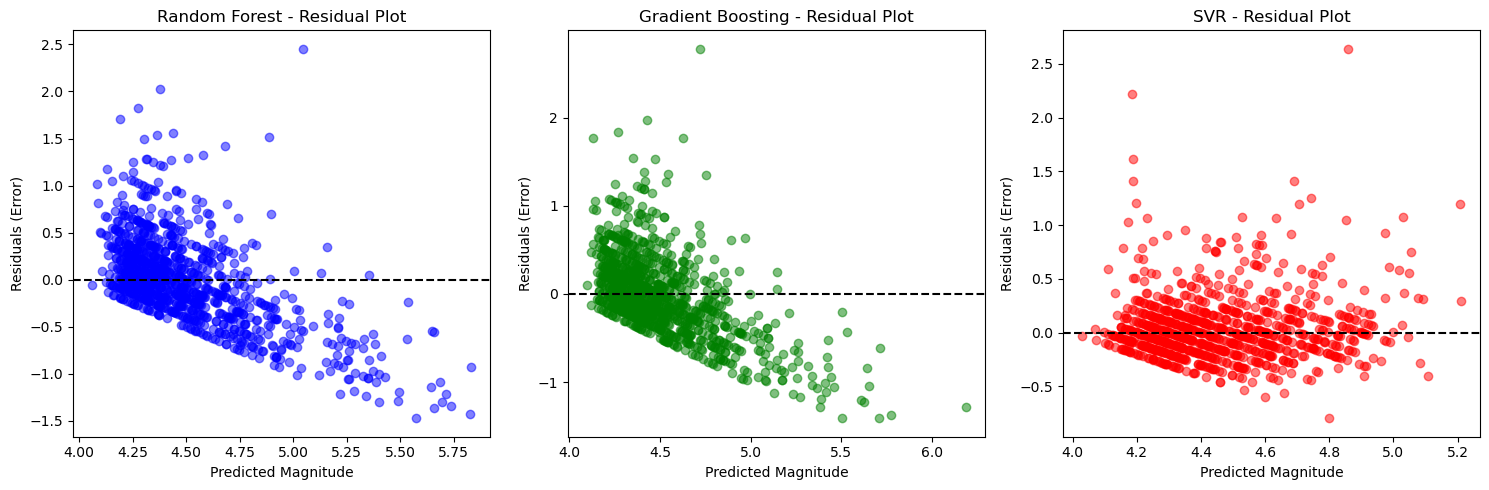

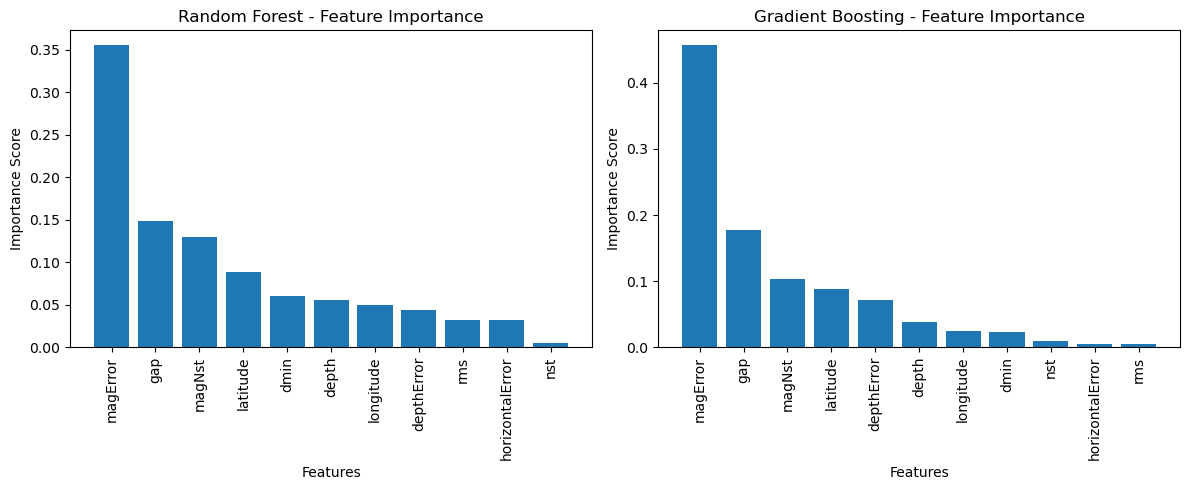

In [95]:


# Scatter plot - Actual vs Predicted
plt.figure(figsize=(15, 5))

models_preds = {"Random Forest": y_pred_rf, "Gradient Boosting": y_pred_gbr, "SVR": y_pred_svr}
colors = ["blue", "green", "red"]

for i, (name, pred) in enumerate(models_preds.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, pred, alpha=0.5, color=colors[i])
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="black")
    plt.xlabel("Actual Magnitude")
    plt.ylabel("Predicted Magnitude")
    plt.title(f"{name} - Actual vs. Predicted")

plt.tight_layout()
plt.show()

# Residual plot (Errors)
plt.figure(figsize=(15, 5))

for i, (name, pred) in enumerate(models_preds.items()):
    plt.subplot(1, 3, i + 1)
    residuals = y_test - pred
    plt.scatter(pred, residuals, alpha=0.5, color=colors[i])
    plt.axhline(y=0, color="black", linestyle="--")
    plt.xlabel("Predicted Magnitude")
    plt.ylabel("Residuals (Error)")
    plt.title(f"{name} - Residual Plot")

plt.tight_layout()
plt.show()

# Feature Importance (RF & GB)
plt.figure(figsize=(12, 5))
for i, model_name in enumerate(["Random Forest", "Gradient Boosting"]):
    model = models[model_name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.subplot(1, 2, i + 1)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(X_train.columns)[indices], rotation=90)
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.title(f"{model_name} - Feature Importance")

plt.tight_layout()
plt.show()
